# Initialization


## Importing the libraries

In [3]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)

## Loading the data

In [4]:
dropout = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/dropout.xls")
enrollments = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/enrollment.xls")
drinks = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/drinking_water.xls")
computers = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/computers.xls")
electricity = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/electricity.xls")
boys_toilet = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/boys_toilet.xls")
girls_toilet = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/girls_toilet.xls")

# Data needs to be standardised!!!!!!!!!!!!!!

# Dropouts are low, other percentages are high!!!!!!
Make function calls to normalise date before clustering and denormalising after clustering

# Data preparation

In [5]:
def returner(xx):
    x=[]
    for i in range(36):
        x.append(xx[['State','All Schools']].loc[3*i])  
    x=pd.DataFrame(x)
    x.set_index('State', inplace=True)
    return x

In [6]:
enrollments['Higher_Secondary_Boys']=enrollments['Higher_Secondary_Boys'].astype('float')
enrollments['Higher_Secondary_Girls']=enrollments['Higher_Secondary_Girls'].astype('int')
enrollments['Higher_Secondary_Total']=enrollments['Higher_Secondary_Total'].astype('int')   
drinks=returner(drinks)
drinks.columns=['Drinking water']
electricity=returner(electricity)
electricity.columns=['Electricity']
computers=returner(computers)
computers.columns=["Computer"]
boys_t=returner(boys_toilet)
boys_t.columns=['Boys toilet']
girls_t=returner(girls_toilet)
girls_t.columns=['Girls toilet']
factors=pd.concat([drinks,electricity,computers,boys_t,girls_t],axis=1)
factors.reset_index(inplace=True)

In [7]:
states=[]
for i in range(36):
    states.append(dropout.State.iloc[3*i])
states=pd.DataFrame(states, columns=['State'])

def create_aggregate(inp):
    inp.drop(['State','Year'],axis=1,inplace=True)

    x=pd.DataFrame()
    for i in range(36):
        x[i]=inp.iloc[3*i+0:i*3+3,:].mean()
    x=x.transpose() 
    return x

In [8]:
dropouts_x = create_aggregate(dropout)
enrollments_x=create_aggregate(enrollments)

# Data exploration

In [9]:
print("\n Correlation between enrollment rates at different stages of schooling\n")
enrollments[['Primary_Total', 'Upper_Primary_Total', 'Secondary_Total','Higher_Secondary_Total']].corr(method='spearman').style.background_gradient(cmap='coolwarm')


 Correlation between enrollment rates at different stages of schooling



,Primary_Total,Upper_Primary_Total,Secondary_Total,Higher_Secondary_Total
Primary_Total,1.000000,0.691324,0.122769,-0.216003
Upper_Primary_Total,0.691324,1.000000,0.513059,0.076870
Secondary_Total,0.122769,0.513059,1.000000,0.659823
Higher_Secondary_Total,-0.216003,0.076870,0.659823,1.000000


### Observations
* There is moderate positive correlation between `primary` and `upper primary` dropouts
* There is moderate positive correlation between `secondary` and `higher secondary` dropouts

Probably in similar states students dropout during the lower classes, and in other similar states the dropout rate is higher in the upper classes.

In [11]:
print("\n Correlation between dropout rates at different stages of schooling\n")
dropout[['PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL']].corr(method='spearman').style.background_gradient(cmap='coolwarm')


 Correlation between dropout rates at different stages of schooling



,PRIMARY_TOTAL,UPPER_PRIMARY_TOTAL,SECONDARY_TOTAL,HRSECONDARY_TOTAL
PRIMARY_TOTAL,1.000000,0.748033,0.384132,-0.255152
UPPER_PRIMARY_TOTAL,0.748033,1.000000,0.605983,-0.144547
SECONDARY_TOTAL,0.384132,0.605983,1.000000,-0.183079
HRSECONDARY_TOTAL,-0.255152,-0.144547,-0.183079,1.000000


### Observations

* Dropouts in `primary` and `upper primary` are positively correlated. We need to do further analysis.

Text(0.5, 0.98, 'Analysis on dropout and enrollment rates')

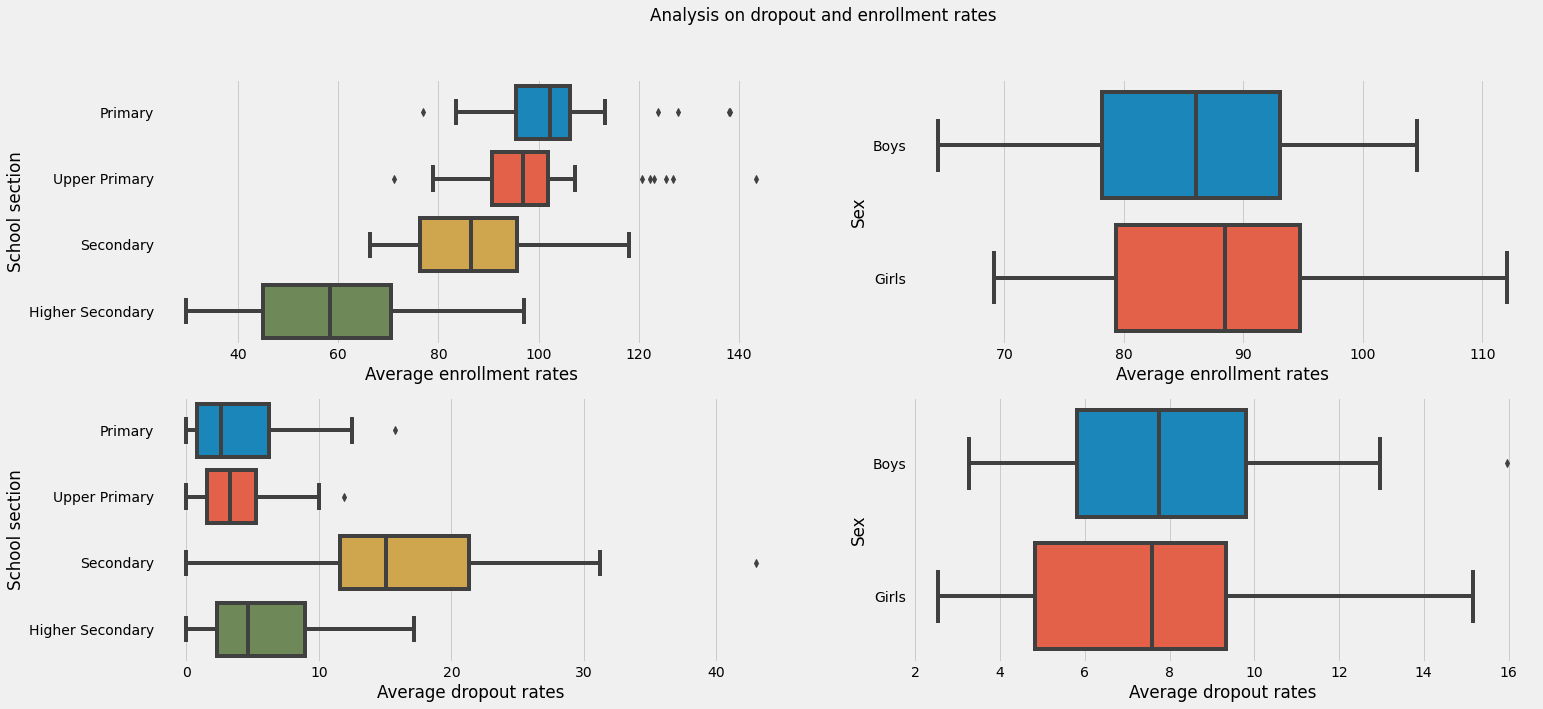

In [18]:
prim=['Primary']*36
uprim=['Upper Primary']*36
sec=['Secondary']*36
usec=['Higher Secondary']*36
lis=prim+uprim+sec+usec
lis
datas=pd.DataFrame({'values':pd.concat([enrollments_x['Primary_Total'],enrollments_x['Upper_Primary_Total'],enrollments_x['Secondary_Total'],enrollments_x['Higher_Secondary_Total']],axis=0), 'ID':lis})

enrollments_boys=(enrollments_x['Primary_Boys']+enrollments_x['Upper_Primary_Boys']+enrollments_x['Secondary_Boys']+enrollments_x['Higher_Secondary_Boys'])/4
enrollments_girls=(enrollments_x['Primary_Girls']+enrollments_x['Upper_Primary_Girls']+enrollments_x['Secondary_Girls']+enrollments_x['Higher_Secondary_Girls'])/4
boys=['Boys']*36
girls=['Girls']*36
sex=boys+girls
enrolls=pd.concat([enrollments_boys,enrollments_girls],axis=0)
datassex1=pd.DataFrame({'Enrollments':enrolls,'Sex':sex})


datass=pd.DataFrame({'values':pd.concat([dropouts_x['PRIMARY_TOTAL'],dropouts_x['UPPER_PRIMARY_TOTAL'],dropouts_x['SECONDARY_TOTAL'],dropouts_x['HRSECONDARY_TOTAL']],axis=0), 'ID':lis})

dropouts_boys=(dropouts_x['PRIMARY_BOYS']+dropouts_x['UPPER_PRIMARY_BOYS']+dropouts_x['SECONDARY_BOYS']+dropouts_x['HRSECONDARY_BOYS'])/4
dropouts_girls=(dropouts_x['PRIMARY_GIRLS']+dropouts_x['UPPER_PRIMARY_GIRLS']+dropouts_x['SECONDARY_GIRLS']+dropouts_x['HRSECONDARY_GIRLS'])/4

drops=pd.concat([dropouts_boys,dropouts_girls],axis=0)
datassex2=pd.DataFrame({'Dropouts':drops,'Sex':sex})

fig,ax=plt.subplots(2,2,figsize=(22,10))

sns.boxplot(x='values',y='ID',data=datas,ax=ax[0,0])
ax[0,0].set_xlabel('Average enrollment rates')
ax[0,0].set_ylabel('School section')
#ax[0].suptitle('Comparison of enrollment rates across different sections of the school')

sns.boxplot(x='Enrollments',y='Sex',data=datassex1,ax=ax[0,1])
ax[0,1].set_xlabel('Average enrollment rates')
ax[0,1].set_ylabel('Sex')
#ax[1].suptitle('Comparison of enrollment rates across sex')

sns.boxplot(x='values',y='ID',data=datass,ax=ax[1,0])
ax[1,0].set_xlabel('Average dropout rates')
ax[1,0].set_ylabel('School section')
#plt.title('Comparison of dropout rates across different sections of the school')


sns.boxplot(x='Dropouts',y='Sex',data=datassex2,ax=ax[1,1])
ax[1,1].set_xlabel('Average dropout rates')
ax[1,1].set_ylabel('Sex')

plt.suptitle("Analysis on dropout and enrollment rates")

In [102]:
factors.corr(method='spearman').style.background_gradient(cmap="coolwarm")

,Drinking water,Electricity,Computer,Boys toilet,Girls toilet
Drinking water,1.000000,0.865238,0.748390,0.696139,0.636747
Electricity,0.865238,1.000000,0.878351,0.642424,0.704691
Computer,0.748390,0.878351,1.000000,0.648551,0.690509
Boys toilet,0.696139,0.642424,0.648551,1.000000,0.874460
Girls toilet,0.636747,0.704691,0.690509,0.874460,1.000000


### Observations

* `Boys toilet` and `girls toilet` are correlated. We need to test whether the percentage of boys toilets in schools and percentage of girls toilets in schools is significantly different. Let us design the hypothesis.

# Check prescence of different factors in different sections of the school

Text(0.5, 1.0, 'Comparison of prescence of different factors in the school')

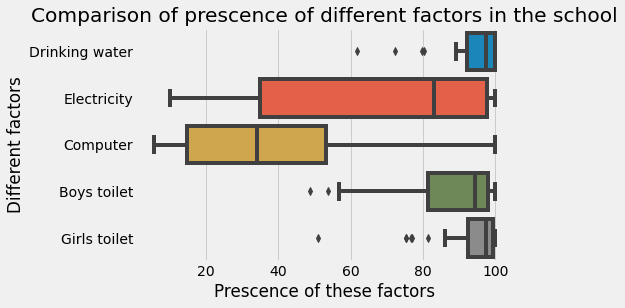

In [20]:
prim=['Drinking water']*36
uprim=['Electricity']*36
uuprim=['Computer']*36
sec=['Boys toilet']*36
usec=['Girls toilet']*36
lis=prim+uprim+uuprim+sec+usec
lis
datas=pd.DataFrame({'values':pd.concat([factors['Drinking water'],factors['Electricity'],factors['Computer'],factors['Boys toilet'], factors['Girls toilet']],axis=0), 'ID':lis})
sns.boxplot(x='values',y='ID',data=datas)
plt.xlabel('Prescence of these factors')
plt.ylabel('Different factors')
plt.title('Comparison of prescence of different factors in the school')

## Clustering

In [103]:
def create_clusters(inx):

    scores=[]
    for i in range(2,36):
        k=KMeans(n_clusters=i,n_init=500, max_iter=500)
        k.fit(inx)
        label=KMeans.predict(k,inx)
        scores.append(silhouette_score(inx, label))

    pd.DataFrame(scores).plot()
    best_cluster_no=np.argmax(scores)+2

    plt.axvline(best_cluster_no)
    plt.text(best_cluster_no, 0.34,s=f"Max silhoutte score at n={best_cluster_no}")
    plt.xlabel("No. of clusters")
    plt.ylabel("Silhoutte score")
    kk=KMeans(n_clusters=best_cluster_no)

    kk.fit(inx)
    lab = pd.DataFrame(kk.labels_,columns=['Labels'])
    result=pd.concat([states['State'],inx,lab['Labels']],axis=1)
    return result

In [104]:
def return_clusters(result):
    grouping=result[['State','Labels']]
    clusters=pd.DataFrame()
    for l in grouping.Labels.unique():
        clusters=pd.concat([clusters,pd.Series(np.array(grouping.State[grouping.Labels==l]), name=f"Cluster {l}").to_frame()],axis=1)
    clusters.replace({np.nan:'-'},inplace=True)
    clusters.sort_index(axis=1, inplace=True)    
    return clusters

# Analysis for different data

## Dropouts

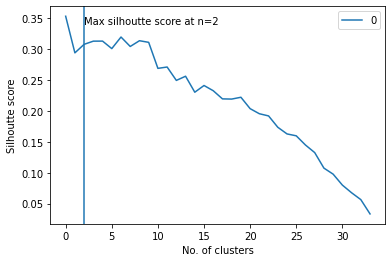

In [107]:
dropouts_x = create_aggregate(dropout)
dropouts_result=create_clusters(dropouts_x[['PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL']])
dropouts_clusters=return_clusters(dropouts_result)

In [108]:
dropouts_clusters

,Cluster 0,Cluster 1
0,Andaman & Nicobar Islands,Assam
1,Andhra Pradesh,Bihar
2,Arunachal Pradesh,Chhattisgarh
3,Chandigarh,Dadra & Nagar Haveli
4,Daman & Diu,Gujarat
5,Delhi,Jharkhand
6,Goa,Karnataka
7,Haryana,Madhya Pradesh
8,Himachal Pradesh,Meghalaya
9,Jammu And Kashmir,Mizoram


In [109]:
reqd=dropouts_result.groupby('Labels')[dropouts_result.columns[1:-1]].agg('mean')
reqd.style.background_gradient(cmap='OrRd')

,PRIMARY_TOTAL,UPPER_PRIMARY_TOTAL,SECONDARY_TOTAL,HRSECONDARY_TOTAL
Labels,,,,
0,3.232083,2.500625,12.374861,7.470625
1,5.912222,6.545000,25.593611,3.444167


### Observations

* Most clusters of states have low dropout rates in the lower classes and higher dropout rates in the upper classes. We need to design a hypothesis to test if the dropout rates in the lower and upper classes are significantly different.

### Hypothesis testing

Take two samples of (>30) states and test whether dropout rates are significantly different.

## Enrollments

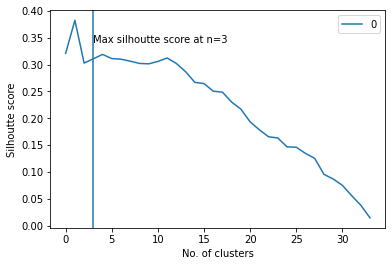

In [110]:
enrollments_result=create_clusters(enrollments_x[['Primary_Total', 'Upper_Primary_Total', 'Secondary_Total','Higher_Secondary_Total']])
enrollments_clusters=return_clusters(enrollments_result)

In [111]:
enrollments_clusters

,Cluster 0,Cluster 1,Cluster 2
0,Andhra Pradesh,Andaman & Nicobar Islands,Arunachal Pradesh
1,Assam,Chandigarh,Manipur
2,Bihar,Delhi,Meghalaya
3,Chhattisgarh,Goa,Mizoram
4,Dadra & Nagar Haveli,Himachal Pradesh,Sikkim
5,Daman & Diu,Kerala,-
6,Gujarat,Lakshadweep,-
7,Haryana,Puducherry,-
8,Jammu And Kashmir,Tamil Nadu,-
9,Jharkhand,-,-


In [112]:
reqd=dropouts_result.groupby('Labels')[dropouts_result.columns[1:-1]].agg('mean')
reqd.style.background_gradient(cmap='YlGn')

,PRIMARY_TOTAL,UPPER_PRIMARY_TOTAL,SECONDARY_TOTAL,HRSECONDARY_TOTAL
Labels,,,,
0,3.232083,2.500625,12.374861,7.470625
1,5.912222,6.545000,25.593611,3.444167


### Observations

* Two clusters 4 & 5 have much higher enrollment rates than the other clusters for the lower classes.
* For the upper classes cluster 5 keeps having higher enrollment rates. Cluster 1 which had very low enrollment rates in lower classes, has higher enrollment rates.
* We need to design a hypothesis to test whether enrollment rates are significantly different in lower and upper classes

### Hypothesis testing

## Other factors

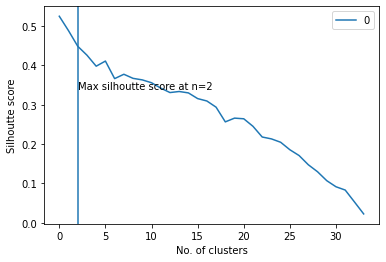

In [113]:
factors_result=create_clusters(factors[['Drinking water', 'Electricity', 'Computer', 'Boys toilet',
       'Girls toilet']])
factors_clusters=return_clusters(factors_result)

In [114]:
factors_clusters

,Cluster 0,Cluster 1
0,Andaman & Nicobar Islands,Arunachal Pradesh
1,Andhra Pradesh,Assam
2,Chandigarh,Bihar
3,Dadra & Nagar Haveli,Chhattisgarh
4,Daman & Diu,Jammu And Kashmir
5,Delhi,Jharkhand
6,Goa,Madhya Pradesh
7,Gujarat,Manipur
8,Haryana,Meghalaya
9,Himachal Pradesh,Nagaland


In [115]:
reqd=factors_result.groupby('Labels')[factors_result.columns[1:-1]].agg('mean')
reqd.style.background_gradient(cmap='GnBu')

,Drinking water,Electricity,Computer,Boys toilet,Girls toilet
Labels,,,,,
0,98.280000,93.424762,55.940952,92.168095,97.143333
1,88.489333,33.644000,15.374667,80.696000,86.678000


### Observations

* Cluster 2 scores high in all the factors required for a comfortable school experience
* Cluster 1 and 0 have low % of computers in their schools


## Analysis

# Normalise the vectors!!!

In [116]:
dropouts_result=dropouts_result[['State','PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL']]
dropouts_result.set_index(['State'],inplace=True)

In [117]:
enrollments_result=enrollments_result[['State','Primary_Total', 'Upper_Primary_Total', 'Secondary_Total','Higher_Secondary_Total']]
enrollments_result.set_index(['State'],inplace=True)

In [118]:
factors_result.set_index(['State'],inplace=True)

In [119]:
dataset=pd.concat([dropouts_result,enrollments_result,factors_result.drop(['Labels'],axis=1)],axis=1)
cols=[]
for col in dataset.columns[:4]:
    cols.append("Dropout-"+col[:-6])
for col in dataset.columns[4:8]:
    cols.append("Enrollments-"+col[:-6])
for col in dataset.columns[8:]:
    cols.append(col)  
dataset.columns=cols

In [120]:
dataset.head(5)

,Dropout-PRIMARY,Dropout-UPPER_PRIMARY,Dropout-SECONDARY,Dropout-HRSECONDARY,Enrollments-Primary,Enrollments-Upper_Primary,Enrollments-Secondary,Enrollments-Higher_Secondary,Drinking water,Electricity,Computer,Boys toilet,Girls toilet
State,,,,,,,,,,,,,
Andaman & Nicobar Islands,0.800000,1.143333,7.543333,15.646667,91.260000,87.863333,93.243333,90.000000,98.69,88.86,53.06,94.52,93.44
Andhra Pradesh,4.750000,4.113333,13.693333,4.046667,89.810000,81.456667,74.370000,57.000000,90.35,90.34,29.57,56.88,81.31
Arunachal Pradesh,12.290000,6.590000,14.843333,13.533333,127.783333,122.200000,89.300000,64.666667,79.79,36.35,24.28,48.73,76.90
Assam,9.680000,8.253333,28.086667,3.976667,111.500000,94.013333,74.526667,34.333333,80.30,19.39,8.85,60.17,75.28
Bihar,0.696667,2.353333,27.123333,0.000000,102.240000,97.733333,69.180000,29.666667,92.53,9.96,5.47,73.42,75.41


In [121]:
dataset.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,Dropout-PRIMARY,Dropout-UPPER_PRIMARY,Dropout-SECONDARY,Dropout-HRSECONDARY,Enrollments-Primary,Enrollments-Upper_Primary,Enrollments-Secondary,Enrollments-Higher_Secondary,Drinking water,Electricity,Computer,Boys toilet,Girls toilet
Dropout-PRIMARY,1.000000,0.808626,0.433988,-0.326441,0.546122,0.140328,-0.348632,-0.430200,-0.798247,-0.718789,-0.614355,-0.535910,-0.429225
Dropout-UPPER_PRIMARY,0.808626,1.000000,0.684685,-0.245976,0.491634,0.171943,-0.469755,-0.650274,-0.640407,-0.595619,-0.549292,-0.590341,-0.480315
Dropout-SECONDARY,0.433988,0.684685,1.000000,-0.314359,0.302703,0.020849,-0.551866,-0.945864,-0.444591,-0.543557,-0.556757,-0.462975,-0.415749
Dropout-HRSECONDARY,-0.326441,-0.245976,-0.314359,1.000000,-0.139472,0.096330,0.235673,0.276393,0.256948,0.451580,0.497875,0.235696,0.301116
Enrollments-Primary,0.546122,0.491634,0.302703,-0.139472,1.000000,0.725354,0.090862,-0.209076,-0.586416,-0.481959,-0.426512,-0.408371,-0.275276
Enrollments-Upper_Primary,0.140328,0.171943,0.020849,0.096330,0.725354,1.000000,0.461776,0.069520,-0.280033,-0.148969,-0.129215,-0.148616,0.032863
Enrollments-Secondary,-0.348632,-0.469755,-0.551866,0.235673,0.090862,0.461776,1.000000,0.695333,0.330924,0.456444,0.456628,0.259627,0.428636
Enrollments-Higher_Secondary,-0.430200,-0.650274,-0.945864,0.276393,-0.209076,0.069520,0.695333,1.000000,0.442021,0.524396,0.553717,0.373720,0.382429
Drinking water,-0.798247,-0.640407,-0.444591,0.256948,-0.586416,-0.280033,0.330924,0.442021,1.000000,0.865238,0.748390,0.696139,0.636747
Electricity,-0.718789,-0.595619,-0.543557,0.451580,-0.481959,-0.148969,0.456444,0.524396,0.865238,1.000000,0.878351,0.642424,0.704691


### Observations

* Dropouts are negatively correlated with factors. Children need more care. They need drinking water because they play a lot. If there isn't electricity, India primarily being a tropical country,discourage them to come to schools. WRITE BETTER AND FOR THE OTHER POINTS
* Correlation with dropouts reduces with increasing age of students
* Same thing observed in enrollments

# Test hypothesis by testing with two samples from upper and lower samples

## Checking feature importance

In [122]:
#Using SVD

vals=np.array(dataset)
u,sig,v_t=np.linalg.svd(vals)
feature_imp=pd.Series(sig,index=list(dataset.columns))
feature_imp.index.name="Feature"
feature_imp.name="Explained variance"
var_exp=pd.DataFrame(feature_imp)
tot=var_exp['Explained variance'].sum()
var_exp['Explained variance'] = var_exp['Explained variance']/tot*100
var_exp.sort_values(['Explained variance'],ascending=False,inplace=True)

exp_var=[]
for i in range(1,var_exp.shape[0]+1):
    exp_var.append(var_exp['Explained variance'].iloc[0:i].sum())
pd.DataFrame(exp_var,index=var_exp.index, columns=['Cumulative explained variance'])

,Cumulative explained variance
Feature,
Dropout-PRIMARY,67.467485
Dropout-UPPER_PRIMARY,78.031625
Dropout-SECONDARY,82.815709
Dropout-HRSECONDARY,86.843422
Enrollments-Primary,90.748241
Enrollments-Upper_Primary,92.898334
Enrollments-Secondary,94.866031
Enrollments-Higher_Secondary,96.244480
Drinking water,97.532508


## We can see the top 3 features explain more than 80% of the variance in the data

In [123]:
clusterset=dataset[['Dropout-PRIMARY', 'Dropout-UPPER_PRIMARY', 'Dropout-SECONDARY']].reset_index()

## Clustering on the basis of these three features

In [124]:
clusters=create_clusters(clusterset.iloc[:,1:])
col={1:'blue',2:'orange',3:'green',4:'red',5:'purple',6:'brown',7:'pink',8:'olive',0:'cyan'}
clusters['color']=clusters.Labels.map(col)

SyntaxError: unmatched ')' (<ipython-input-124-be7cfa852838>, line 1)

# Find average dropouts below and sort the clusters by that

In [31]:
reqd=clusters.groupby('Labels')[clusters.columns[1:-1]].agg('mean')
reqd.style.background_gradient(cmap='GnBu')

,Dropout-PRIMARY,Dropout-UPPER_PRIMARY,Dropout-SECONDARY,Labels
Labels,,,,
0,1.291944,1.302778,10.203611,0
1,8.867333,8.859333,24.395333,1
2,1.807778,4.079722,20.323333,2
3,13.506667,7.458889,16.052222,3
4,3.120000,3.473333,42.966667,4
5,5.176111,3.600000,14.715000,5
6,1.566667,3.078333,29.173333,6
7,0.000000,0.540000,0.000000,7


In [ ]:
### Observations

* 

In [32]:
import plotly.express as px
fig = px.scatter_3d(clusters, y='Dropout-PRIMARY', z='Dropout-UPPER_PRIMARY', x='Dropout-SECONDARY', opacity=0.7, color='color',symbol='Labels',text='State')
fig.update_layout(width=1200, height=720)